# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [3]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


# Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

# Feature Engineering

In [19]:
# Numerical Columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(f"Categorical Columns: {list(numerical_cols)}")

Categorical Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [21]:
# Categorial Columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {list(categorical_cols)}")

Categorical Columns: ['ocean_proximity']


In [24]:
for i in data:
    print(i)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


# Data Cleaning

In [27]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Numerical Imputation - Fill missing numerical values with median
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        median_value = data[col].median()
        df.method({col: value}, inplace=True)
        
# Categorical Imputation - Fill missing categorical values with most frequent value
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)

# Check if missing values are handled
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values After Cleaning:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Feature Encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding
encode1 = pd.get_dummies(data, columns=categorical_cols)

# Show the shape and a preview
print(f"Data shape before encoding: {data.shape}")
print(f"Data shape after encoding: {data.shape}")
encode1.head()

Data shape before encoding: (20640, 10)
Data shape after encoding: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,False,True,False


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(encode1)
X_scaled = pd.DataFrame(X_scaled, columns=encode1.columns)

X_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,-0.891156,-0.681889,-0.015566,2.830742,-0.384466


# Feature Scaling

In [33]:
X = X_scaled.drop('median_house_value', axis=1)
y = X_scaled['median_house_value']

In [35]:
print(f"Feature Columns: {list(X.columns)}")

Feature Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [39]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,-0.891156,-0.681889,-0.015566,2.830742,-0.384466


In [41]:
y.head()

0    2.129631
1    1.314156
2    1.258693
3    1.165100
4    1.172900
Name: median_house_value, dtype: float64

In [43]:
np.corrcoef(X['median_income'],y)

array([[1.        , 0.68807521],
       [0.68807521, 1.        ]])

In [55]:
for i in X:
    if i == 'ocean_proximity':
        continue
    print(f"feature name:{i}")
    r = np.corrcoef(X[i], y)[0,1]
    print(f"Correlation: {r:.2f}")
    print()

feature name:longitude
Correlation: -0.05

feature name:latitude
Correlation: -0.14

feature name:housing_median_age
Correlation: 0.11

feature name:total_rooms
Correlation: 0.13

feature name:total_bedrooms
Correlation: 0.05

feature name:population
Correlation: -0.02

feature name:households
Correlation: 0.07

feature name:median_income
Correlation: 0.69

feature name:ocean_proximity_<1H OCEAN
Correlation: 0.26

feature name:ocean_proximity_INLAND
Correlation: -0.48

feature name:ocean_proximity_ISLAND
Correlation: 0.02

feature name:ocean_proximity_NEAR BAY
Correlation: 0.16

feature name:ocean_proximity_NEAR OCEAN
Correlation: 0.14



In [45]:
X_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,-0.891156,-0.681889,-0.015566,2.830742,-0.384466


# Model Training

### Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split

# 80% Train, 20% Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train shape: {X_train_scaled.shape}, {y_train.shape}")
print(f"Test shape: {X_test_scaled.shape}, {y_test.shape}")

Train shape: (16512, 13), (16512,)
Test shape: (4128, 13), (4128,)


In [136]:
X_train_scaled

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.01556621,
        -0.35564565,  2.62975816],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.18553953,  0.90651045, -1.07984112, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ]])

In [138]:
X_test_scaled

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [ 0.06097472, -0.23549054,  0.11043502, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.42487026,  1.00947776,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [ 0.60445493, -0.66608108, -0.92113763, ..., -0.01556621,
        -0.35564565, -0.3802631 ]])

In [140]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [142]:
models = [
    ('Linear Regression', LinearRegression()),
    ('SGD', SGDRegressor()),
    ('Randomforest', RandomForestRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('SVM', SVR())
]

In [144]:
models

[('Linear Regression', LinearRegression()),
 ('SGD', SGDRegressor()),
 ('Randomforest', RandomForestRegressor()),
 ('KNN', KNeighborsRegressor()),
 ('SVM', SVR())]

In [51]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654,-0.891156,-0.681889,-0.015566,-0.353264,2.601007
8267,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620,-0.891156,-0.681889,-0.015566,-0.353264,2.601007
17445,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349,-0.891156,-0.681889,-0.015566,-0.353264,2.601007
14265,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947,-0.891156,-0.681889,-0.015566,-0.353264,2.601007
2271,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583,-0.891156,1.466514,-0.015566,-0.353264,-0.384466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.803453,-0.867017,0.505394,-0.598545,-0.800795,-0.677723,-0.739013,1.315592,1.122138,-0.681889,-0.015566,-0.353264,-0.384466
11964,1.067992,-0.754652,0.346478,0.205466,0.079072,0.289220,-0.132192,-0.431983,-0.891156,1.466514,-0.015566,-0.353264,-0.384466
5390,0.593818,-0.749970,0.584852,-0.245128,0.076687,0.291870,0.071825,-0.492832,1.122138,-0.681889,-0.015566,-0.353264,-0.384466
860,-1.193070,0.912092,-1.083767,0.430534,0.143452,0.310414,0.155525,0.973025,1.122138,-0.681889,-0.015566,-0.353264,-0.384466


In [148]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20046,0.279366,0.200449,-0.289187,-0.518327,-0.242831,-0.029562,-0.367597,-1.152489,-0.891156,1.466514,-0.015566,-0.353264,-0.384466
3024,0.054757,-0.230283,0.108104,0.140833,-0.242831,0.123206,0.220915,-0.705015,-0.891156,1.466514,-0.015566,-0.353264,-0.384466
15663,-1.432653,1.015093,1.856182,0.547423,-0.242831,-0.101972,1.212230,-0.205588,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
20484,0.424114,-0.632923,-0.924851,0.190339,-0.242831,0.246834,-0.011874,0.982710,1.122138,-0.681889,-0.015566,-0.353264,-0.384466
9814,-1.178096,0.462633,0.425936,-0.130532,-0.242831,-0.320086,-0.187120,-0.076678,-0.891156,-0.681889,-0.015566,-0.353264,2.601007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,1.172810,-1.063655,-1.004309,0.242595,-0.130761,-0.065767,-0.124345,0.386535,1.122138,-0.681889,-0.015566,-0.353264,-0.384466
16623,-0.629052,-0.127282,-0.050812,0.773408,0.832562,0.198266,0.537403,-0.602214,-0.891156,-0.681889,-0.015566,-0.353264,2.601007
18086,-1.237992,0.785682,-0.289187,0.676230,0.002769,0.140868,0.179065,2.820927,1.122138,-0.681889,-0.015566,-0.353264,-0.384466
2144,-0.094982,0.532861,0.584852,-0.059023,-0.168913,-0.175266,-0.066802,-0.571473,-0.891156,1.466514,-0.015566,-0.353264,-0.384466


In [150]:
y_train

14196   -0.900020
8267     1.518675
17445   -0.296863
14265   -0.983214
2271    -0.956349
           ...   
11284    0.193636
11964   -0.945083
5390     0.132107
860      0.664202
15795    1.023843
Name: median_house_value, Length: 16512, dtype: float64

In [75]:
y_test

20046   -1.379252
3024    -1.395718
15663    2.540411
20484    0.101776
9814     0.616539
           ...   
15362    0.489148
16623    0.519479
18086    2.540411
2144    -1.166067
3665    -0.479716
Name: median_house_value, Length: 4128, dtype: float64

In [77]:
X_train.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [79]:
X_test.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

# Model Selection

In [152]:
for name, model in models:
    print(f"\n📌 Model: {name}")
    
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on Training Data
    y_train_pred = model.predict(X_train)
    print("\n🔹 Train Performance:")
    print(f"  MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
    print(f"  RMSE: {root_mean_squared_error(y_train, y_train_pred):.2f}") 
    print(f"  R²: {r2_score(y_train, y_train_pred):.2f}")
    print(f"  Training Error (MSE): {mean_squared_error(y_train, y_train_pred):.2f}")

    # Predictions on Testing Data
    y_test_pred = model.predict(X_test)
    print("\n🔹 Test Performance:")
    print(f"  MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
    print(f"  RMSE: {root_mean_squared_error(y_test, y_test_pred):.2f}") 
    print(f"  R²: {r2_score(y_test, y_test_pred):.2f}")
    print(f"  Testing Error (MSE): {mean_squared_error(y_test, y_test_pred):.2f}")

    print("\n" + "-"*50)  # Separator for readability


📌 Model: Linear Regression

🔹 Train Performance:
  MAE: 0.43
  RMSE: 0.59
  R²: 0.65
  Training Error (MSE): 0.35

🔹 Test Performance:
  MAE: 0.44
  RMSE: 0.61
  R²: 0.63
  Testing Error (MSE): 0.37

--------------------------------------------------

📌 Model: SGD

🔹 Train Performance:
  MAE: 639.49
  RMSE: 32105.42
  R²: -1026727121.24
  Training Error (MSE): 1030758242.02

🔹 Test Performance:
  MAE: 637.97
  RMSE: 32107.28
  R²: -1047508811.28
  Testing Error (MSE): 1030877280.65

--------------------------------------------------

📌 Model: Randomforest

🔹 Train Performance:
  MAE: 0.10
  RMSE: 0.16
  R²: 0.98
  Training Error (MSE): 0.02

🔹 Test Performance:
  MAE: 0.27
  RMSE: 0.43
  R²: 0.82
  Testing Error (MSE): 0.18

--------------------------------------------------

📌 Model: KNN

🔹 Train Performance:
  MAE: 0.29
  RMSE: 0.43
  R²: 0.82
  Training Error (MSE): 0.18

🔹 Test Performance:
  MAE: 0.35
  RMSE: 0.53
  R²: 0.71
  Testing Error (MSE): 0.28

--------------------------

On above selection it is been clear that Linear Regression and Random Forest are the models that gives us a better
Training and Testing Accuracy as compare to other models.

We will compare them and check that which model will interpret a better accuracy.

In [154]:
# Initialize Model
model = LinearRegression()

# Train Model
model.fit(X_train, y_train)

# Predict on Train and Test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Performance
print("Train Performance:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_train, y_train_pred):.2f}") 
print(f"R²: {r2_score(y_train, y_train_pred):.2f}")

print("\nTest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_train, y_train_pred):.2f}") 
print(f"R²: {r2_score(y_test, y_test_pred):.2f}")

Train Performance:
MAE: 0.43
RMSE: 0.59
R²: 0.65

Test Performance:
MAE: 0.44
RMSE: 0.59
R²: 0.63


In [156]:
# Initialize Model
model = RandomForestRegressor()

# Train Model
model.fit(X_train, y_train)

# Predict on Train and Test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Performance
print("Train Performance:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_train, y_train_pred):.2f}") 
print(f"R²: {r2_score(y_train, y_train_pred):.2f}")

print("\nTest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_test_pred):.2f}") 
print(f"R²: {r2_score(y_test, y_test_pred):.2f}")

Train Performance:
MAE: 0.10
RMSE: 0.16
R²: 0.98

Test Performance:
MAE: 0.27
RMSE: 0.42
R²: 0.82


📌 After Interpretation of both models

🔹LINEAR REGRESSION

1.Very poor fit — only 65% accuracy on train and 63% on test.

2.MSE is very high, meaning large prediction errors.

3.This confirms Linear Regression isn’t capturing the complex relationships between features and house prices.
    
🔹RANDOM FOREST

1.Much better fit — 98% accuracy on train and 82% on test mean slight overfitting remains.
But this is reasonable for real-world data — perfect generalization is almost never possible.

2.MSE is almost cut in half for test data.

3.✅ This confirms that Random Forest (with tuning) captures the non-linear relationships much better.

# Model Evaluation

In [55]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(   # Hyperparameter Tuning
    n_estimators=100,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred, dataset_name=""):
    print(f"{dataset_name} Error (MSE): {mean_squared_error(y_true, y_pred):.2f}")
    print(f"{dataset_name} Accuracy (R²): {r2_score(y_true, y_pred):.2f}\n")

evaluate(y_train, y_train_pred, "Train")
evaluate(y_test, y_test_pred, "Test")

Train Error (MSE): 0.12
Train Accuracy (R²): 0.88

Test Error (MSE): 0.20
Test Accuracy (R²): 0.80



# Saving Model

In [59]:
import joblib

# Save the model
joblib.dump(model, 'house_price_model_rf.pkl')
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(encode1, "model/encoder.pkl")

print("Model saved as 'house_price_prediction_model_rf.pkl'")

Model saved as 'house_price_prediction_model_rf.pkl'


# Visualize Prediction vs Actual (Test Data)

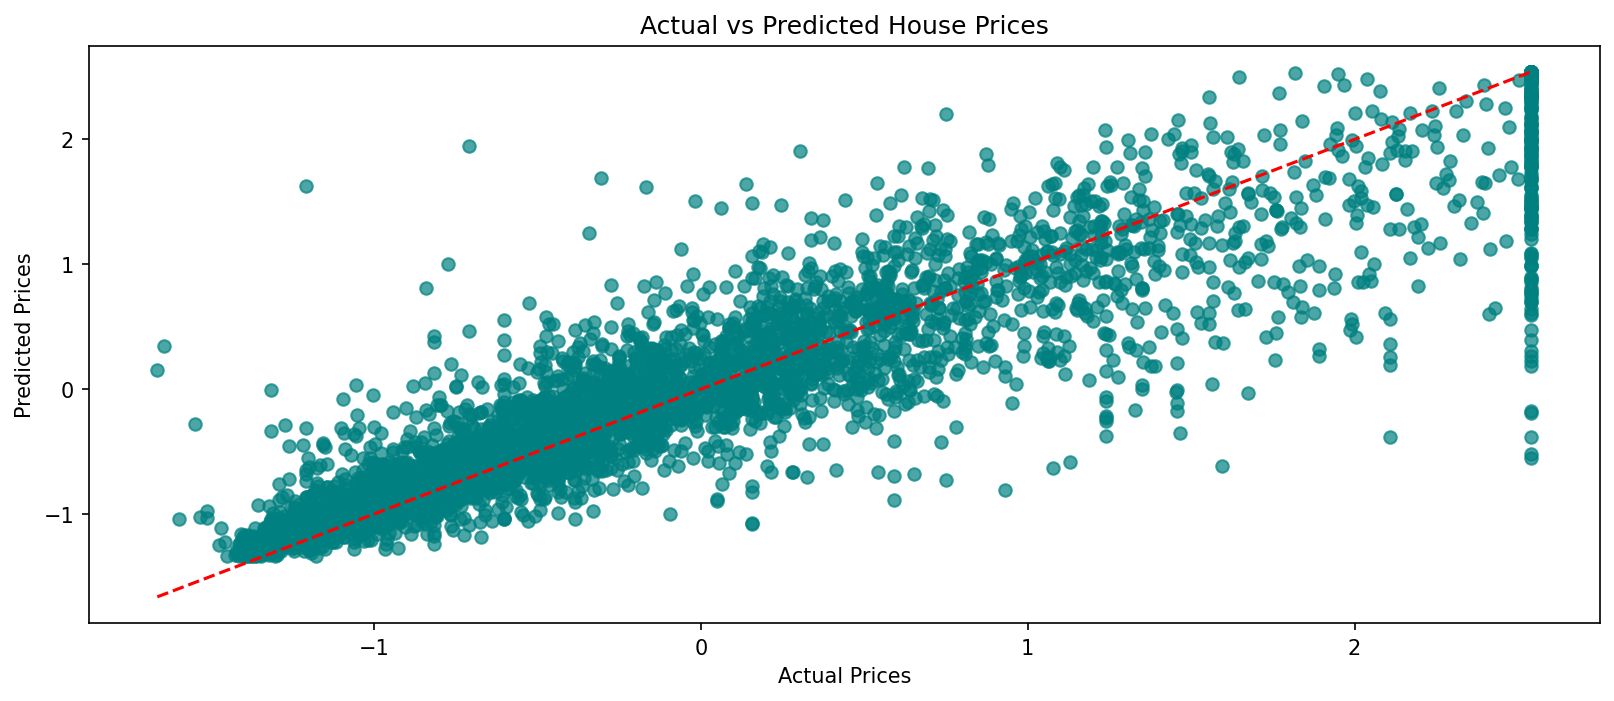

In [164]:
plt.figure(figsize=(13, 5), dpi=150)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Residual Plot (Test Data)

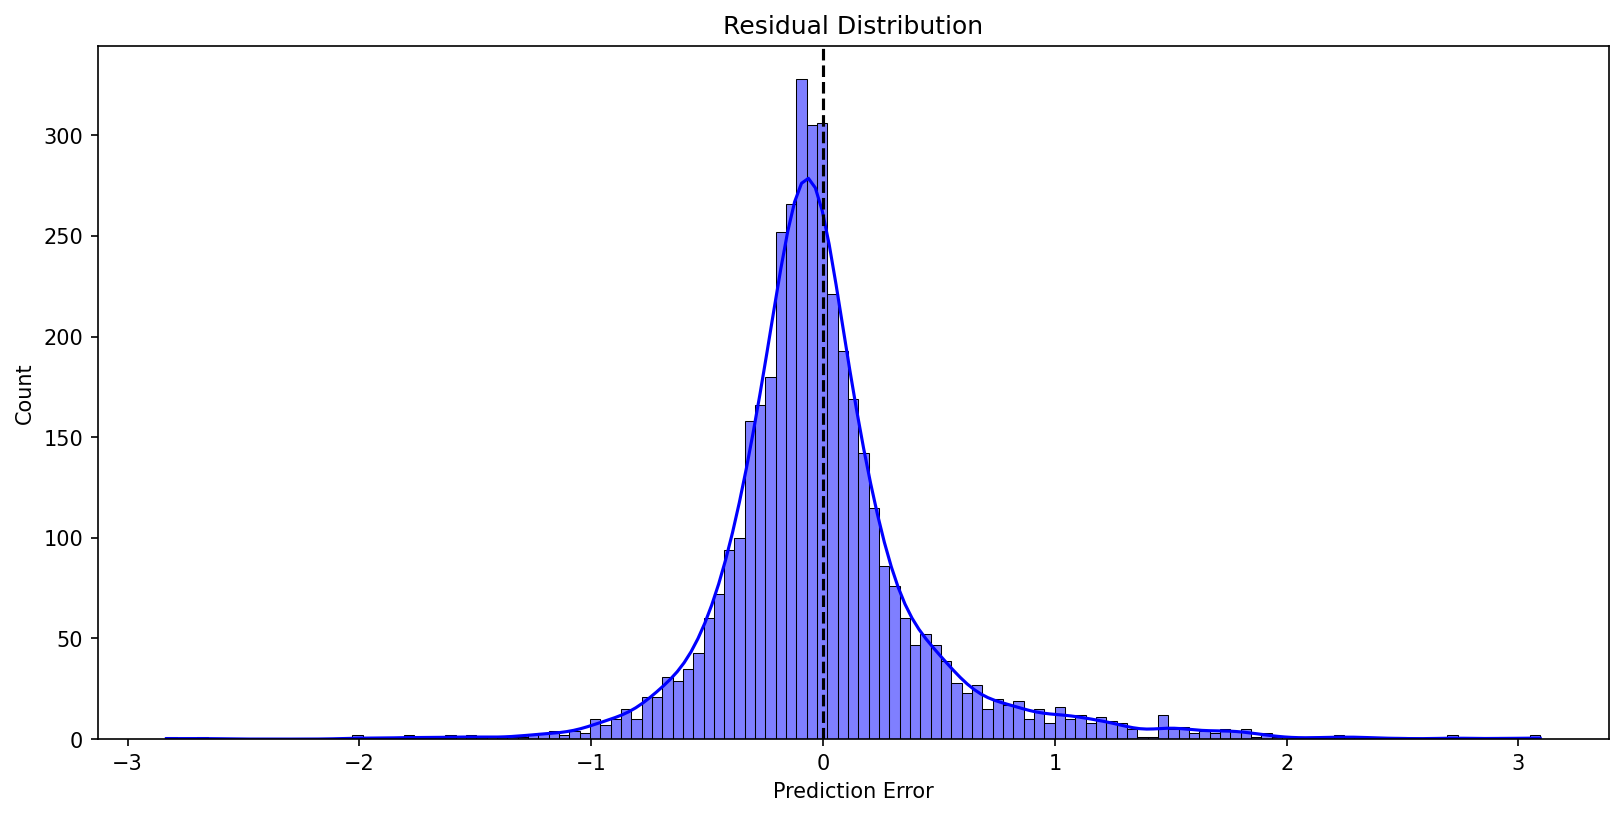

In [166]:
residuals = y_test - y_test_pred

plt.figure(figsize=(13, 6), dpi=150)
sns.histplot(residuals, kde=True, color='blue')
plt.axvline(0, color='black', linestyle='--')
plt.title('Residual Distribution')
plt.xlabel('Prediction Error')
plt.show()

# Feature Importance Plot

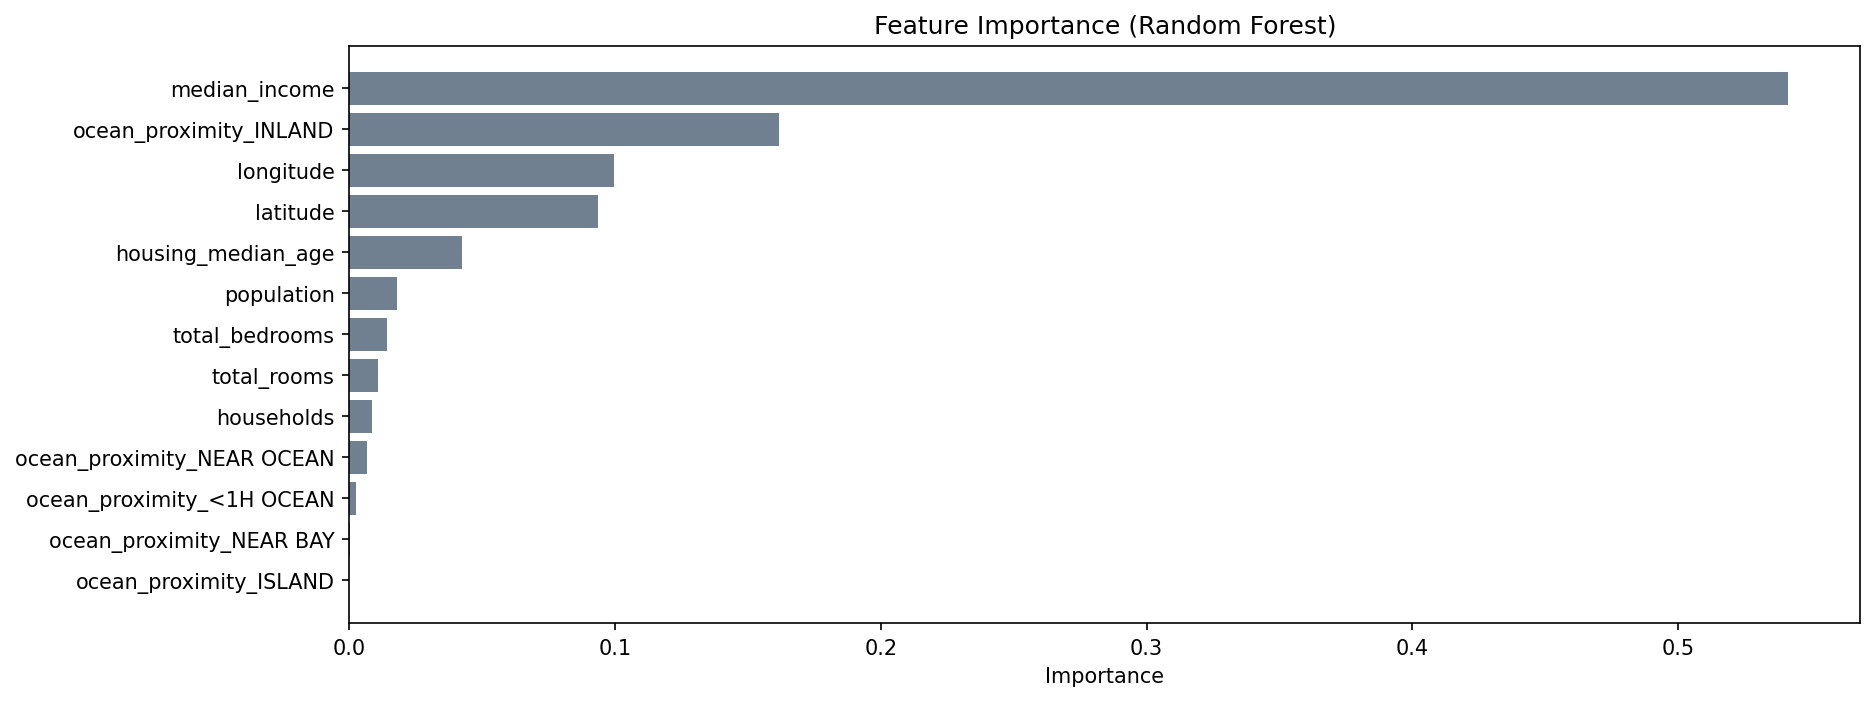

In [168]:
importances = model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(13, 5), dpi=150)
plt.barh(importance_df['Feature'], importance_df['Importance'], color='slategray')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

### Co-relation Heatmap

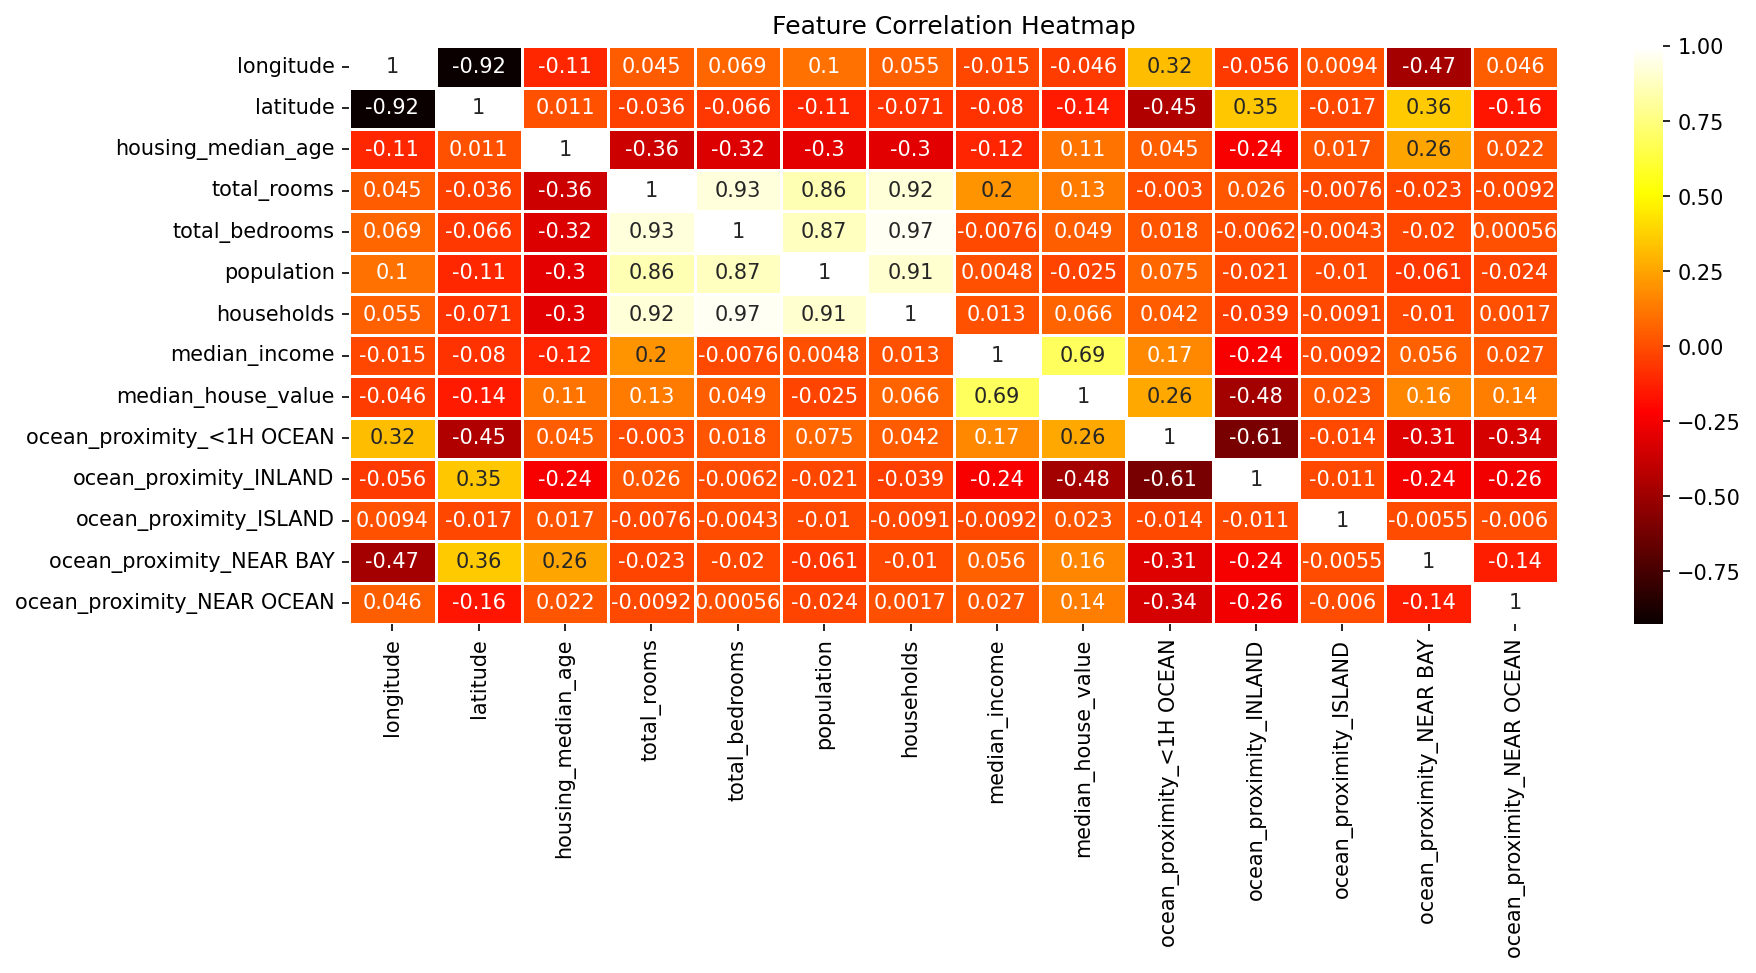

In [206]:
plt.figure(figsize=(13, 5), dpi=150)
sns.heatmap(X_scaled.corr(), annot=True, cmap='hot', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Distribution of House Prices

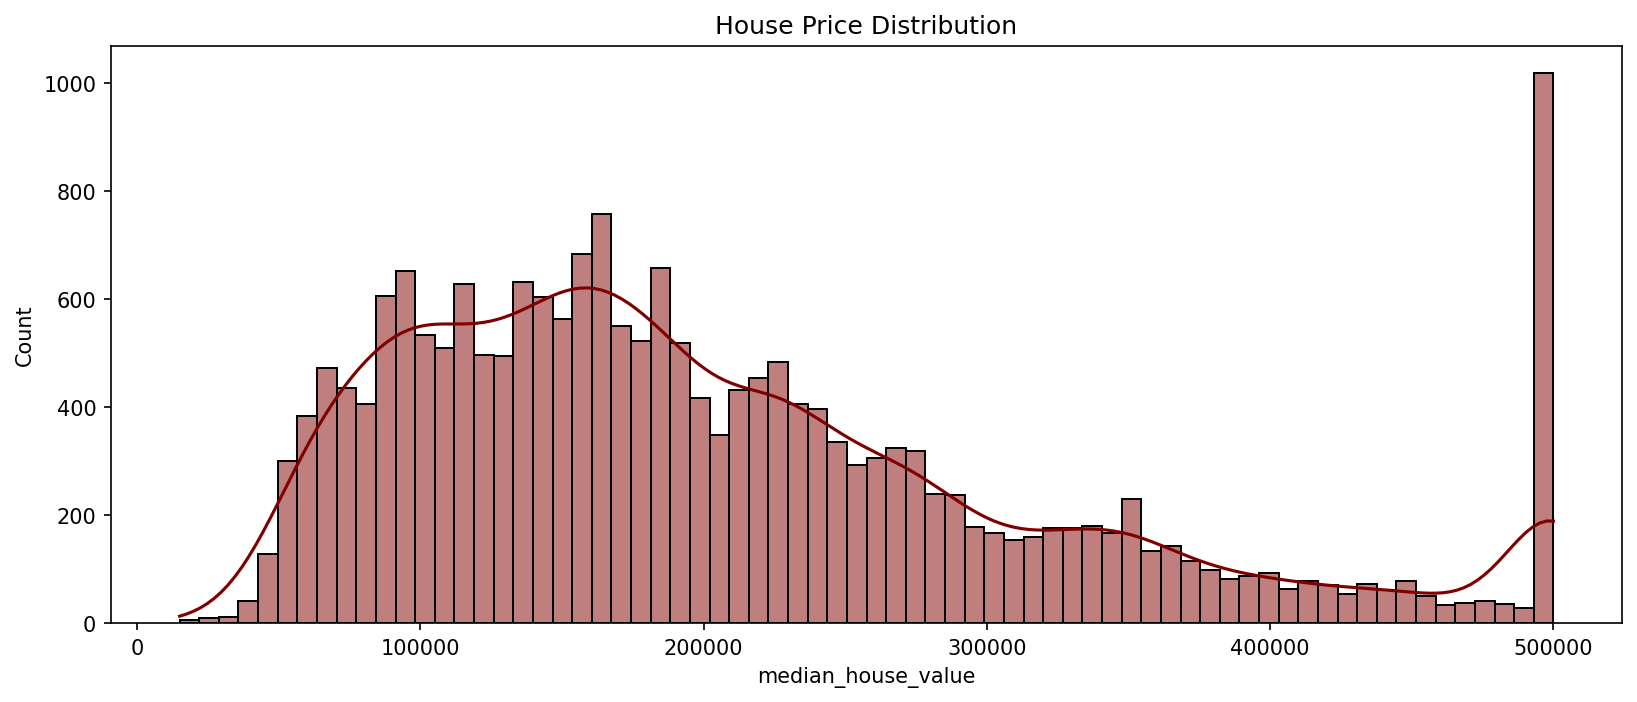

In [172]:
plt.figure(figsize=(13, 5), dpi=150)
sns.histplot(data['median_house_value'], kde=True, bins=70, color='maroon')
plt.title("House Price Distribution")
plt.show()

### House Price vs. Location (Latitude & Longitude)

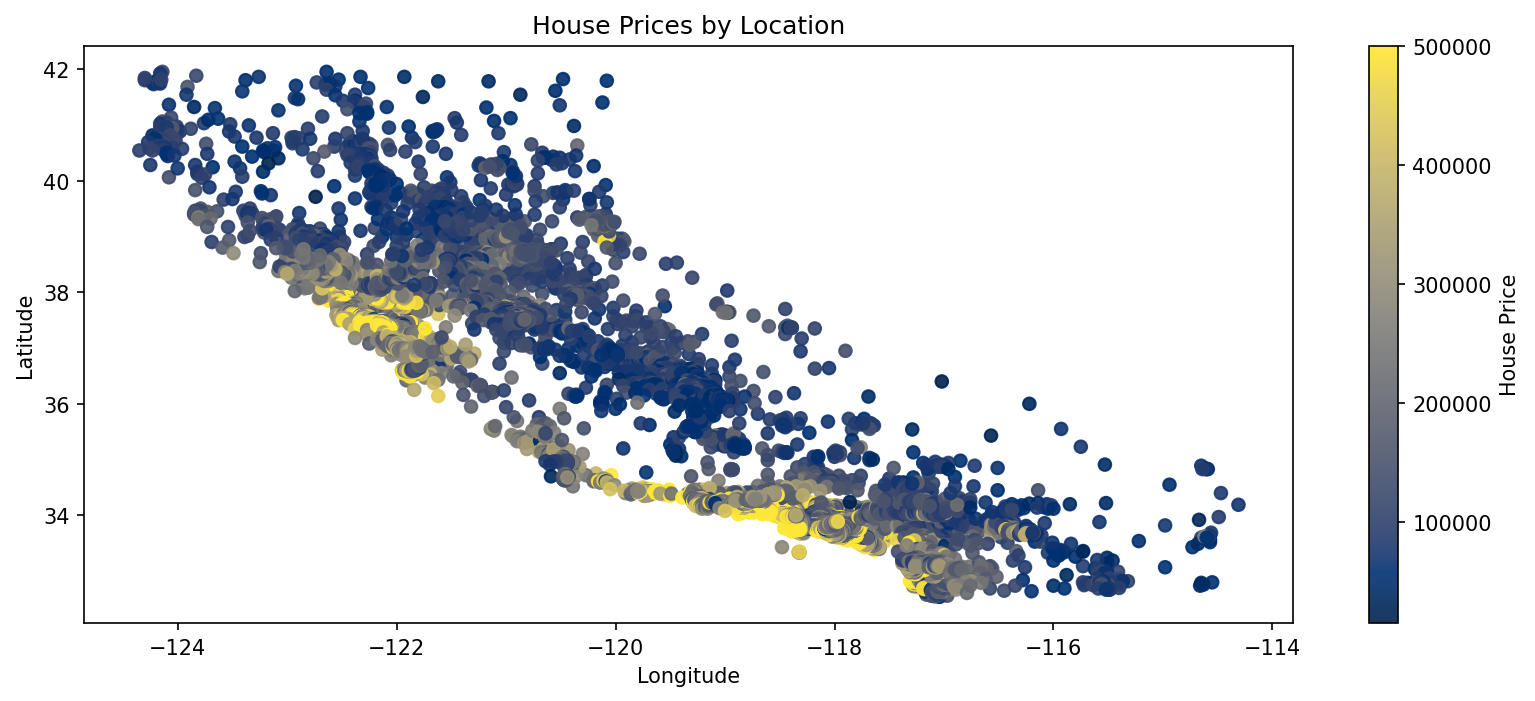

In [174]:
plt.figure(figsize=(13, 5), dpi=150)
plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'], cmap='cividis', alpha=0.9)
plt.colorbar(label='House Price')
plt.title('House Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Population vs. House Price 

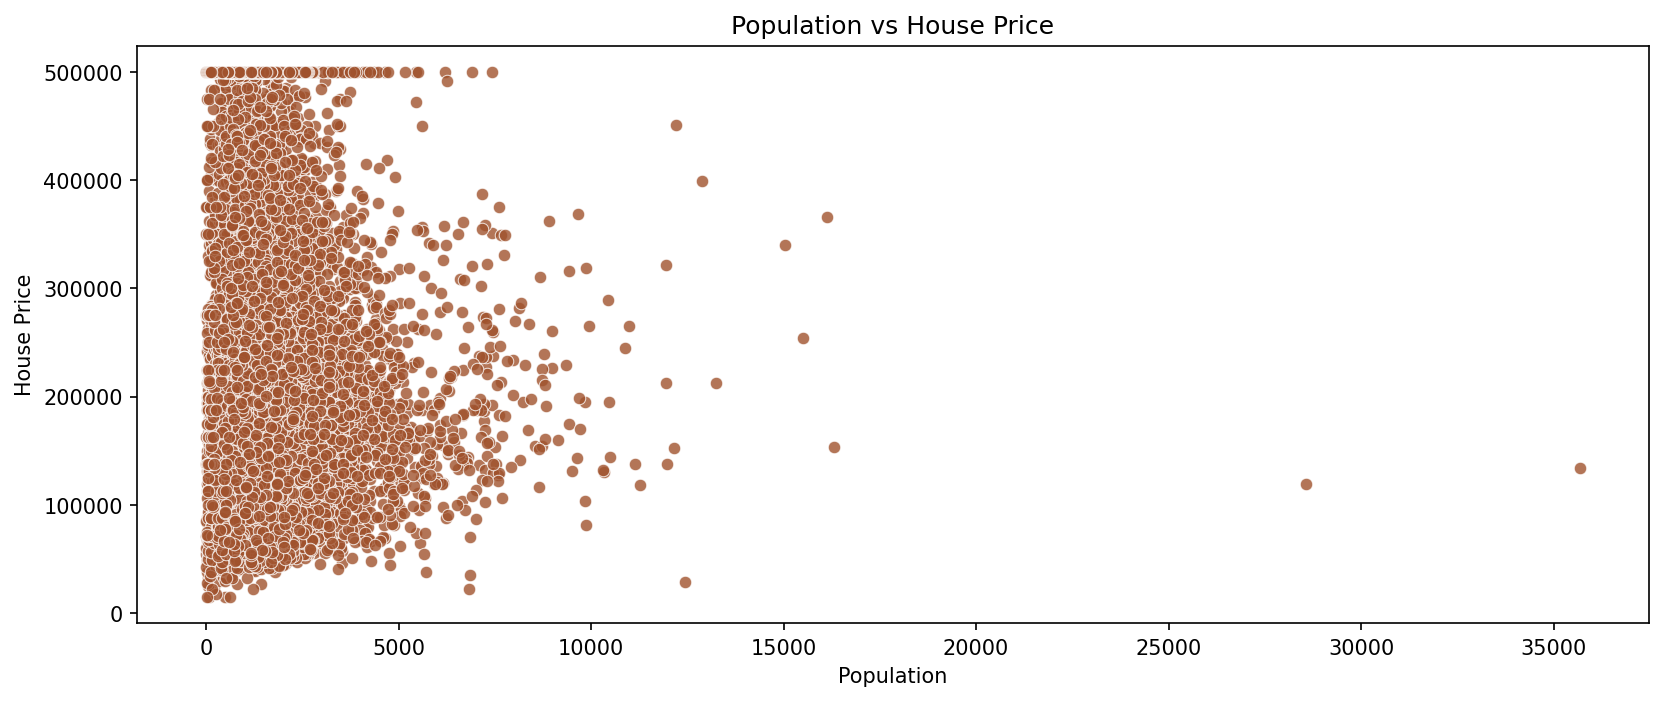

In [176]:
plt.figure(figsize=(13, 5), dpi=150)
sns.scatterplot(x='population', y='median_house_value', data=data, color='sienna', alpha=0.8)
plt.title('Population vs House Price')
plt.xlabel('Population')
plt.ylabel('House Price')
plt.show()

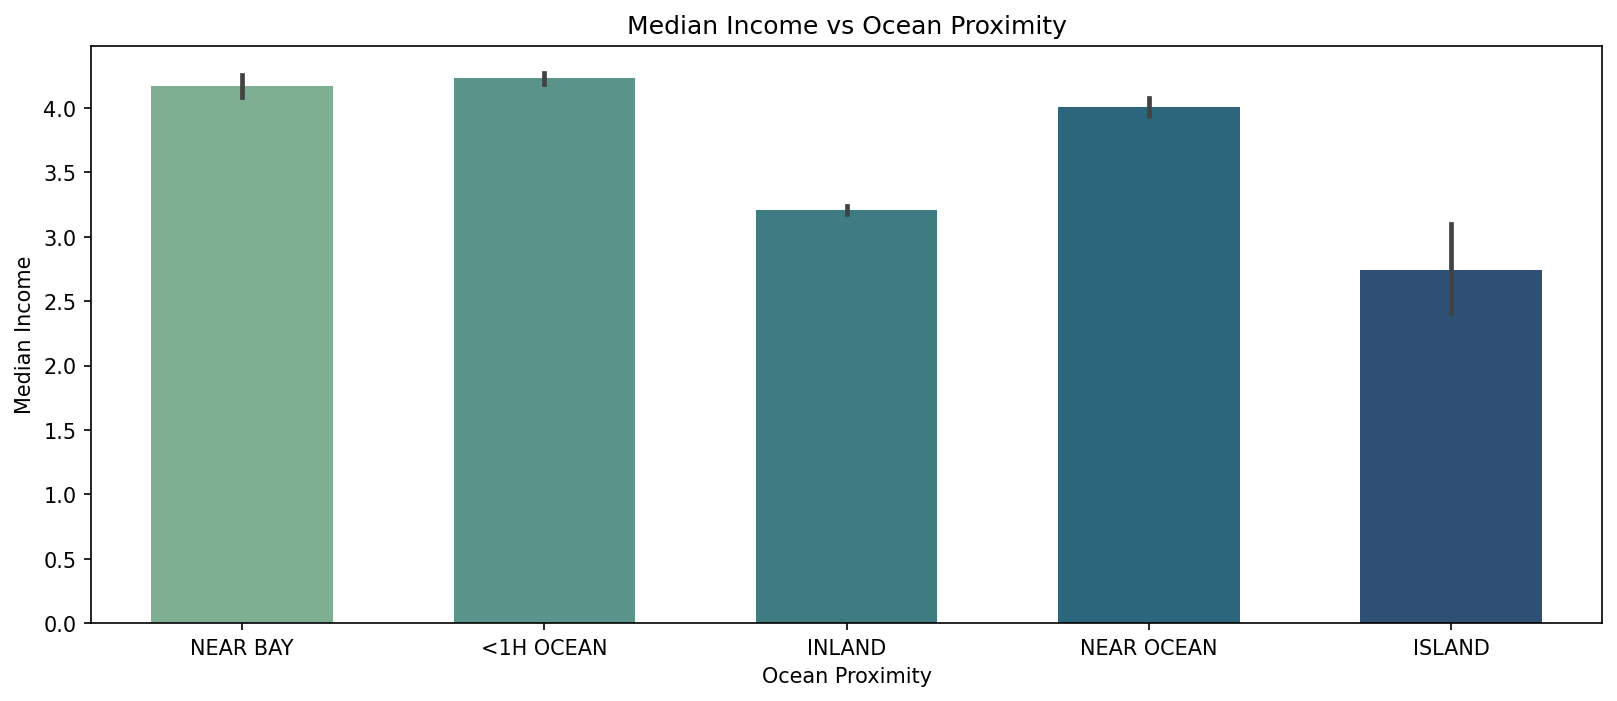

In [192]:
plt.figure(figsize=(13, 5), dpi=150)
sns.barplot(data, x="ocean_proximity", y="median_income", hue='ocean_proximity', palette='crest', width=0.6)
plt.title('Median Income vs Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')
plt.show()